In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("processed data/data.csv")

In [10]:
df = df[["Date", "tv", "pbr"]]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,tv,pbr
Date,,
2023-01-31,6.15,11.600000
2023-02-01,6.46,11.420000
2023-02-02,6.41,10.920000
2023-02-03,6.15,10.840000
2023-02-06,5.80,11.190000
...,...,...
2024-01-24,2.88,15.890000
2024-01-25,2.94,16.670000
2024-01-26,3.18,17.049999


## Lets visulise data

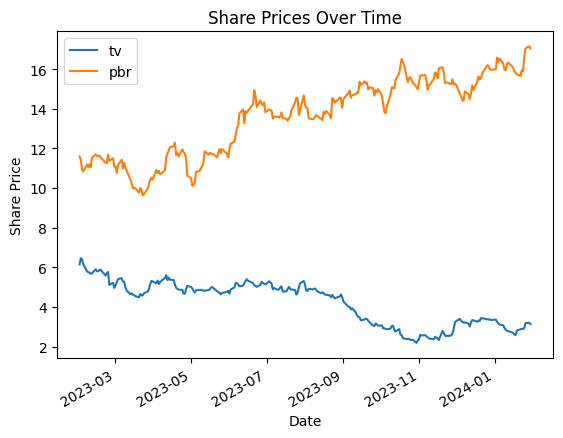

In [13]:
# Plotting
df.plot()
plt.title('Share Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.legend()
plt.show()